In [1]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start = '2004', end = '2019', data_source = 'yahoo')

goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [2]:
goog = goog['Close']

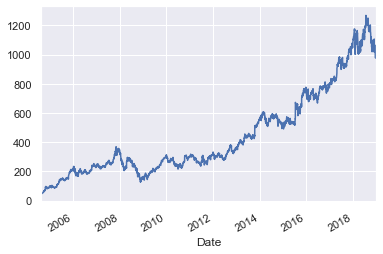

In [3]:
import matplotlib.pyplot as plt
import seaborn;seaborn.set()
%matplotlib inline
goog.plot()
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\google.jpg")

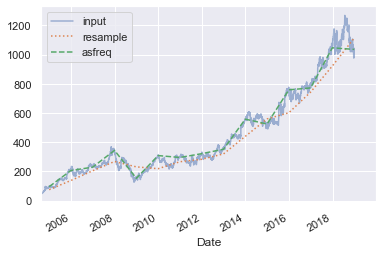

In [28]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc = 'upper left')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\google1.jpg")

# 对工作日数据按天进行重新取样：

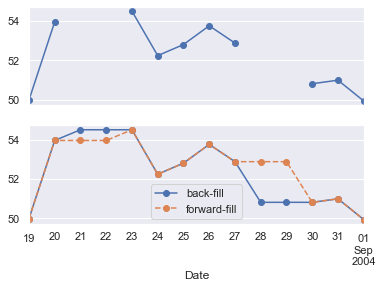

In [33]:
fig, ax = plt.subplots(2, sharex = True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker ='o')

# data.asfreq('D', method='fbill').plot(ax=ax[1], style='-o')   代码bug 'bfill'写成了'fbill'常常藏在细节处，,细节是魔鬼
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\google2.jpg")

# 对google股票收盘价进行重新取样

## 时间迁移
另一种常用的时间序列操作是对数据按时间进行迁移。Pandas有两种解决这类问题的方法;shift()
和tshift()。简单来说，shift()就是迁移数据，而tshift()就是迁移索引。两种方法都是按照频率
代码进行迁移。下面将用shift()和tshift()两种方法让数据迁移900天，代码如下：

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, sharey=True)

# 对数据应用实践频率，用向后填充解决缺失值
goog = goog.asfreq('D', method = 'pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])


# 设置图例与标签
local_max = pd.to_datetime('2017-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color = 'red')
ax[0].axvline(local_max, alpha=0.3, color = 'red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight = 'heavy', color = 'red')
ax[1].axvline(local_max + offset, alpha=0.3, color = 'red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color = 'red')
ax[2].axvline(local_max + offset, alpha=0.3, color = 'red');
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\google3.jpg")

我们还可以用迁移后的值来计算Google股票一年期的投资回报率

In [ ]:
ROI = 100 * (goog.tshift(-365) / goog -1)
ROI.plot()
plt.ylabel('% Return on Investment');
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\google股票价格当前的投资回报率.jpg")

## 移动时间窗口
可以通过下面的代码获取Google股票收盘价的一年期移动平均值和标准差

In [ ]:
rolling = goog.rolling(365, center = True)
data = pd.DataFrame({'input': goog, 
                     'one-year rolling_mean': rolling.mean(), 
                     'one_year rollings_std': rolling.std()})
ax = data.plot(style = ['-', '--', ':'])
ax.lines[0].set_alpha(0.3)
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\Google股票收盘价的移动统计值.jpg")